In [2]:
import tensorflow


In [3]:
tensorflow.__version__

'2.12.0'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
upload=files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [6]:
df=pd.read_csv("UCI_Credit_Card.csv")

In [7]:
df=df[0:5000]

In [8]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20000.0,2,2,1,36,0,0,0,0,0,...,19224.0,19050.0,19353.0,2000.0,1283.0,1003.0,1000.0,1002.0,1005.0,0
4996,180000.0,2,4,1,34,-1,-1,-1,-1,0,...,6282.0,8282.0,0.0,6892.0,6892.0,6282.0,2000.0,0.0,0.0,0
4997,200000.0,2,2,1,45,0,0,0,0,0,...,121888.0,66771.0,65495.0,4543.0,5000.0,4500.0,3100.0,3000.0,1300.0,1
4998,310000.0,1,3,1,44,0,0,0,0,0,...,265764.0,271231.0,277427.0,10000.0,10000.0,20000.0,10000.0,11000.0,11000.0,0


In [9]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   5000 non-null   float64
 1   SEX                         5000 non-null   int64  
 2   EDUCATION                   5000 non-null   int64  
 3   MARRIAGE                    5000 non-null   int64  
 4   AGE                         5000 non-null   int64  
 5   PAY_0                       5000 non-null   int64  
 6   PAY_2                       5000 non-null   int64  
 7   PAY_3                       5000 non-null   int64  
 8   PAY_4                       5000 non-null   int64  
 9   PAY_5                       5000 non-null   int64  
 10  PAY_6                       5000 non-null   int64  
 11  BILL_AMT1                   5000 non-null   float64
 12  BILL_AMT2                   5000 non-null   float64
 13  BILL_AMT3                   5000 

In [11]:

X=df.drop("default.payment.next.month",axis=1)

In [12]:
y=df['default.payment.next.month']

In [13]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20000.0,2,2,1,36,0,0,0,0,0,...,19003.0,19224.0,19050.0,19353.0,2000.0,1283.0,1003.0,1000.0,1002.0,1005.0
4996,180000.0,2,4,1,34,-1,-1,-1,-1,0,...,6892.0,6282.0,8282.0,0.0,6892.0,6892.0,6282.0,2000.0,0.0,0.0
4997,200000.0,2,2,1,45,0,0,0,0,0,...,122181.0,121888.0,66771.0,65495.0,4543.0,5000.0,4500.0,3100.0,3000.0,1300.0
4998,310000.0,1,3,1,44,0,0,0,0,0,...,250277.0,265764.0,271231.0,277427.0,10000.0,10000.0,20000.0,10000.0,11000.0,11000.0


In [14]:
y

0       1
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: default.payment.next.month, Length: 5000, dtype: int64

In [15]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5000 non-null   float64
 1   SEX        5000 non-null   int64  
 2   EDUCATION  5000 non-null   int64  
 3   MARRIAGE   5000 non-null   int64  
 4   AGE        5000 non-null   int64  
 5   PAY_0      5000 non-null   int64  
 6   PAY_2      5000 non-null   int64  
 7   PAY_3      5000 non-null   int64  
 8   PAY_4      5000 non-null   int64  
 9   PAY_5      5000 non-null   int64  
 10  PAY_6      5000 non-null   int64  
 11  BILL_AMT1  5000 non-null   float64
 12  BILL_AMT2  5000 non-null   float64
 13  BILL_AMT3  5000 non-null   float64
 14  BILL_AMT4  5000 non-null   float64
 15  BILL_AMT5  5000 non-null   float64
 16  BILL_AMT6  5000 non-null   float64
 17  PAY_AMT1   5000 non-null   float64
 18  PAY_AMT2   5000 non-null   float64
 19  PAY_AMT3   5000 non-null   float64
 20  PAY_AMT4

In [16]:
y=pd.get_dummies(y,drop_first=True)

In [17]:
y

,1
0,1
1,1
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,1
4998,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33, random_state=42)

In [20]:
X_train.shape

(3350, 23)

In [21]:
y_train.shape

(3350, 1)

In [22]:
X_test.shape

(1650, 23)

In [23]:
y_test.shape

(1650, 1)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [28]:
classifier=Sequential()

classifier.add(Dense(units=10, kernel_initializer="he_uniform",activation="relu",input_dim=23))

classifier.add(Dense(units=10, kernel_initializer="he_uniform",activation="relu"))

classifier.add(Dense(units=1, kernel_initializer="glorot_uniform",activation="sigmoid"))

In [29]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [30]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=20,validation_split=0.25)

Epoch 1/20
252/252 [==============================] - 7s 5ms/step - loss: 0.6697 - accuracy: 0.6150 - val_loss: 0.5404 - val_accuracy: 0.7959
Epoch 2/20
252/252 [==============================] - 1s 4ms/step - loss: 0.5379 - accuracy: 0.7783 - val_loss: 0.4957 - val_accuracy: 0.8103
Epoch 3/20
252/252 [==============================] - 1s 4ms/step - loss: 0.5126 - accuracy: 0.7862 - val_loss: 0.4769 - val_accuracy: 0.8103
Epoch 4/20
252/252 [==============================] - 1s 4ms/step - loss: 0.4984 - accuracy: 0.7866 - val_loss: 0.4718 - val_accuracy: 0.8115
Epoch 5/20
252/252 [==============================] - 1s 4ms/step - loss: 0.4899 - accuracy: 0.7926 - val_loss: 0.4675 - val_accuracy: 0.8115
Epoch 6/20
252/252 [==============================] - 1s 4ms/step - loss: 0.4834 - accuracy: 0.7946 - val_loss: 0.4644 - val_accuracy: 0.8055
Epoch 7/20
252/252 [==============================] - 1s 4ms/step - loss: 0.4792 - accuracy: 0.7926 - val_loss: 0.4638 - val_accuracy: 0.8091
Epoch 

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
model_history.history['accuracy']

[0.6150477528572083,
 0.7782643437385559,
 0.7862260937690735,
 0.7866241931915283,
 0.7925955653190613,
 0.7945860028266907,
 0.7925955653190613,
 0.7973726391792297,
 0.7981687784194946,
 0.7957802414894104,
 0.7969745397567749,
 0.793789803981781,
 0.7957802414894104,
 0.7945860028266907,
 0.7933917045593262,
 0.7945860028266907,
 0.7973726391792297,
 0.7989649772644043,
 0.7961783409118652,
 0.7965764403343201]

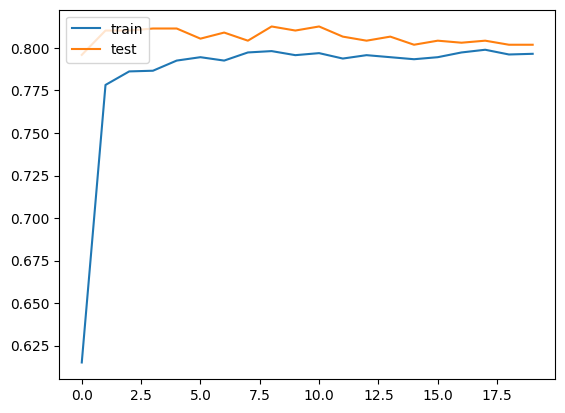

In [34]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


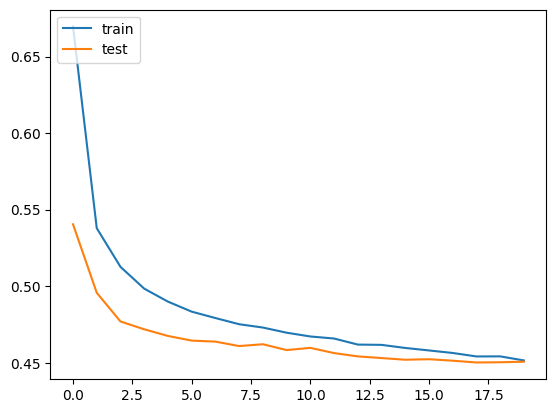

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
y_pred=classifier.predict(X_test)

52/52 [==============================] - 0s 2ms/step


In [37]:
y_pred=y_pred>0.5

In [38]:
y_train.shape

(3350, 1)

In [39]:
y_test.shape

(1650, 1)

In [40]:
X_test.shape

(1650, 23)

In [41]:
X_train.shape

(3350, 23)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm=confusion_matrix(y_test,y_pred)

In [44]:
cm

array([[1231,   64],
       [ 252,  103]])

In [45]:
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])*100

In [46]:
acc

80.84848484848484

In [47]:
import time
import os

In [48]:
def save_model(model_dir="Saved Models"):
  os.makedirs(model_dir,exist_ok=True)
  file_name=time.strftime("Model_%Y_m_%d_%H_%M_%S.h5")
  model_path=os.path.join(model_dir,file_name)
  print("your model will be saved at location {}".format(model_path))
  return model_path

In [49]:
classifier.save(save_model())

your model will be saved at location Saved Models/Model_2023_m_01_18_32_28.h5


In [50]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 15.4 MB/s eta 0:00:00


In [51]:
from kerastuner.tuners import RandomSearch


<ipython-input-51-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [52]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32, kernel_initializer="he_uniform",activation="relu",input_dim=23))

  model.add(Dense(units=32, kernel_initializer="he_uniform", activation="relu"))

  model.add(Dense(units=1, activation="relu"))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","adagrad","adadelta","rmsprop"])
  model.compile(optimizer=optimizer, loss="binary_crossentropy",metrics=['accuracy'])

  return model

In [53]:
tuner=RandomSearch(build_model, objective="val_accuracy", directory='project1',project_name='credit-card')

In [54]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.5575757622718811

Best val_accuracy So Far: 0.7927272915840149
Total elapsed time: 00h 00m 34s


In [55]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [56]:
bestmodel=tuner.get_best_models(num_models=1)[0]

In [57]:
bestmodel.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [58]:
 from tensorflow.keras import optimizers

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model   

In [59]:
tuner_second=RandomSearch(build_model,objective="val_accuracy",directory="project1",project_name="credit_card1")

In [60]:
tuner_second.search(X_train,y_train, validation_data=(X_test,y_test))

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.7842424511909485

Best val_accuracy So Far: 0.8115151524543762
Total elapsed time: 00h 01m 21s


In [61]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 13,
 'units_0': 288,
 'units_1': 160,
 'learning_rate': 0.001,
 'units_2': 416,
 'units_3': 224,
 'units_4': 224,
 'units_5': 448,
 'units_6': 64,
 'units_7': 128,
 'units_8': 128,
 'units_9': 32,
 'units_10': 64,
 'units_11': 160,
 'units_12': 384,
 'units_13': 480,
 'units_14': 192,
 'units_15': 288,
 'units_16': 160,
 'units_17': 32,
 'units_18': 128,
 'units_19': 320}

In [75]:
classifier=tuner_second.get_best_models(num_models=1)[0]

In [79]:
classifier

In [80]:
classifier.build(input_shape=(3350,))

In [81]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (3350, 288)               6912      
                                                                 
 dense_1 (Dense)             (3350, 160)               46240     
                                                                 
 dense_2 (Dense)             (3350, 416)               66976     
                                                                 
 dense_3 (Dense)             (3350, 224)               93408     
                                                                 
 dense_4 (Dense)             (3350, 224)               50400     
                                                                 
 dense_5 (Dense)             (3350, 448)               100800    
                                                                 
 dense_6 (Dense)             (3350, 64)                2